In [217]:
import numpy as np
import pandas as pd
import os 

In [218]:
aas_residualmz={"G":57.02147,"A":71.03712,"S":87.03203,"P":97.05277,"V":99.06842,"T":101.04768,"C":103.00919,"I":113.08407,"L":113.08407,"N":114.04293
,"D":115.02695,"Q":128.05858,"K":128.09497,"E":129.0426,"M":131.04049,"H":137.05891,"F":147.06842,"R":156.10112,"Y":163.06333,"W":186.07932}
aas=['A' ,'C', 'D' ,'E', 'F', 'G', 'H', 'I' ,'K', 'L', 'M', 'N' ,'P' ,'Q' ,'R' ,'S', 'T', 'V', 'W' ,'Y']

In [219]:
path="C:\\Workplace\\C#\\Test\\immonium_mass_neh\\immonium_mass\\bin\\x64\\Debug\\"

data=pd.DataFrame()
for f in ["Liver_l21.csv"]:    
    data=pd.concat([data,pd.read_csv(path+f)])
    
    
data["ion_count"]=[ len(str(x).split('|')) for x in data[["values"]].values]
print(data.shape)
data=data[data.ion_count>=2]
data=data.reset_index(drop=True)
print(data.shape)

(25144, 9)
(14811, 9)


In [220]:
all_mz=pd.DataFrame(np.unique([ int(float(j)*100)/100 for i in [x for x in [x.split("|") for x in data["values"]] ] for j in i], return_counts=True)).transpose()
all_mz.columns=["mz","freq"]
all_mz=all_mz[all_mz.freq>100]

In [221]:
dict_res={x:{"count":0,"total":0,"aas":[],"peps":[]} for x in all_mz.mz}
count=0
for i in range(data.shape[0]): 
    temp=np.unique([ int(float(x)*100)/100 for x in data["values"][i].split("|")])
    temp=[x for x in temp if x in list(all_mz.mz)]
    if len(temp)==0:
        continue
        
    for mz in all_mz[all_mz.mz>= min(temp)].mz:
        dict_res[mz]["total"]+=1        
    
    for mz in temp:
        dict_res[mz]["count"]+=1
        dict_res[mz]["aas"]+=list(np.unique(list(data["peptide"][i])))
        dict_res[mz]["peps"]+=[data["peptide"][i]]
    

In [222]:
res=[]
for char in aas:
    temp_count=0
    for i in range(data.shape[0]):
        if char in list(data.peptide[i]):
            temp_count+=1
    res.append(temp_count)
df=pd.DataFrame()
df["AA"]=aas
df["freq"]=res
df=df.sort_values(by="freq").reset_index(drop=True).transpose()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
AA,W,C,M,H,Y,N,Q,F,P,R,T,D,I,K,S,E,G,A,V,L
freq,2013,2141,3596,3993,4736,5703,6029,6144,6470,7186,7315,7480,7523,7865,7939,8487,8566,8885,8989,10761


In [223]:
# aa_dict_res={x:{"count":0, "mzs":{mzs:{"count":0,"total":0} for mzs in all_mz.mz} }  for x in aas}
# aa_dict_res['A']['mzs'][65.39]

In [224]:
aa_dict_res={x:{"count":0, "mzs":{mzs:{"count":0,"total":0} for mzs in all_mz.mz} }  for x in aas}
count=0
for i in range(data.shape[0]): 
    temp=np.unique([ int(float(x)*100)/100 for x in data["values"][i].split("|")])
    temp=[x for x in temp if x in list(all_mz.mz)]
     
    if len(temp)==0:
        continue
        
    for c in np.unique(list(data.peptide[i])):
        
        aa_dict_res[c]["count"]+=1
        
        
        
        for mz in all_mz[all_mz.mz>= min(temp)].mz:
            if mz <= aas_residualmz[c]:
                aa_dict_res[c]['mzs'][mz]["total"]+=1        
    
        for mz in temp:
            if mz <= aas_residualmz[c]:
                aa_dict_res[c]['mzs'][mz]["count"]+=1
            
        
    if(i%1000==0):
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


In [232]:
chars="H"
res=[]
for mz in all_mz.mz:
#     print(aa_dict_res["H"])
    aa_mz_percentage=0
    if aa_dict_res[chars]["mzs"][mz]['total'] >0:
        aa_mz_percentage=100*aa_dict_res[chars]["mzs"][mz]['count']/aa_dict_res[chars]["mzs"][mz]['total']
        
    singal_occurrence = 0
    if aa_dict_res[chars]['count'] >0:
        singal_occurrence=100*aa_dict_res[chars]["mzs"][mz]['count']/aa_dict_res[chars]['count']
    
    
        
    res.append([mz,aa_dict_res[chars]['count'],
                aa_dict_res[chars]["mzs"][mz]['count'],aa_dict_res[chars]["mzs"][mz]['total'],
                aa_mz_percentage   ,singal_occurrence ])
#     print(mz,'\t',100*aa_dict_res["H"]["mzs"][mz]['count']/aa_dict_res["H"]["mzs"][mz]['total'])
    
res=pd.DataFrame(res)
res.columns=["mz","total_aa_occur","actual_count","expected_count","aa_mz_percentage","singal_occurrence"]
res=res.sort_values(by=["aa_mz_percentage"],ascending=False)
res.head(50)

,mz,total_aa_occur,actual_count,expected_count,aa_mz_percentage,singal_occurrence
0,65.39,3985,21,21,100.000000,0.526976
71,110.07,3985,2789,2795,99.785331,69.987453
3,70.06,3985,152,153,99.346405,3.814304
38,86.09,3985,924,952,97.058824,23.186951
5,72.08,3985,178,188,94.680851,4.466750
34,84.08,3985,744,799,93.116395,18.670013
111,129.10,3985,3667,3985,92.020075,92.020075
32,84.04,3985,592,741,79.892038,14.855709
92,120.08,3985,2673,3472,76.987327,67.076537
1,69.07,3985,35,51,68.627451,0.878294


In [226]:
# selected_res=[]
# for k in dict_res.keys():
# #     print(k,dict_res[k]["count"],dict_res[k]["total"],"\t===>\t",100*dict_res[k]["count"]/dict_res[k]["total"])
#     selected_res.append([k,dict_res[k]["count"],dict_res[k]["total"],100*dict_res[k]["count"]/dict_res[k]["total"]])

In [227]:
# selected_res=pd.DataFrame(selected_res)
# selected_res.columns=["mz","freq","Total","perc"]
# selected_res=selected_res.sort_values(by="perc",ascending=False).reset_index(drop=True)
# selected_res.to_csv("possible_mz.csv",index=False)
# selected_res.head(50)

In [228]:
selected_res=[]
for k in dict_res.keys():
    
    possible_aa=list(set([key for key,val in aas_residualmz.items() if val >=k ])- set(['K','L','R']))
    temp=(pd.DataFrame(np.unique([x for x in dict_res[k]["aas"] if x in possible_aa],return_counts=True)).transpose())
    temp.columns=["aa","perc"]
    temp.perc=100*temp.perc/dict_res[k]["count"]
    temp=temp.sort_values(by="perc",ascending=False)
    temp=(temp[temp.perc>30].reset_index(drop=True))
    if (temp.shape[0]>0):
        print("mz:",k,"count:",f'{dict_res[k]["count"]}({int(1000*dict_res[k]["count"]/dict_res[k]["total"])/10})',"Range available:",dict_res[k]["total"],"\n")
        print(temp.head(15))
        print("------------------------------------------\n")
  

mz: 65.39 count: 177(100.0) Range available: 177 

  aa       perc
0  A  59.322034
1  V  51.412429
2  F  42.937853
3  I  36.723164
------------------------------------------

mz: 69.07 count: 367(76.2) Range available: 481 

  aa       perc
0  I  72.207084
1  A  51.226158
2  V  49.046322
3  F  35.149864
4  S  32.152589
5  P   31.06267
6  T  30.517711
------------------------------------------

mz: 70.02 count: 127(23.0) Range available: 550 

  aa       perc
0  A  50.393701
1  S   44.88189
2  V   44.88189
3  N  40.944882
4  F   40.15748
5  D  38.582677
6  E  36.220472
7  I  33.070866
8  P  30.708661
------------------------------------------

mz: 70.06 count: 1213(98.8) Range available: 1227 

  aa       perc
0  A  53.091509
1  V  52.679308
2  I   42.95136
3  F   35.77906
4  S  34.130256
5  P  32.976092
6  E   32.15169
7  T  31.492168
------------------------------------------

mz: 71.06 count: 223(17.8) Range available: 1249 

  aa       perc
0  P  61.883408
1  V  51.569507
2  I  41.2

mz: 86.14 count: 139(2.9) Range available: 4705 

  aa       perc
0  I  76.978417
1  V   46.76259
2  S  41.007194
3  E   40.28777
4  D   33.81295
5  P  33.093525
6  F  30.935252
------------------------------------------

mz: 87.05 count: 1952(40.6) Range available: 4804 

  aa       perc
0  V     53.125
1  N  48.565574
2  I  46.055328
3  E   44.77459
4  D  39.395492
5  T  39.293033
6  F  36.116803
7  P  33.196721
------------------------------------------

mz: 87.1 count: 2561(52.7) Range available: 4855 

  aa       perc
0  I  52.323311
1  V   50.91761
2  E  42.288169
3  D  40.101523
4  F  36.352987
5  T  35.650137
6  P  33.893011
------------------------------------------

mz: 88.03 count: 682(13.9) Range available: 4888 

  aa       perc
0  D  54.105572
1  V   50.58651
2  E  45.307918
3  N  44.868035
4  I  42.375367
5  T  37.829912
6  P   33.13783
7  F  32.404692
8  Q  31.378299
------------------------------------------

mz: 88.04 count: 754(15.3) Range available: 4920 

  aa     

mz: 119.05 count: 279(2.3) Range available: 12094 

  aa       perc
0  Y  66.666667
1  E  49.103943
2  F  37.275986
3  Q  34.767025
------------------------------------------

mz: 119.08 count: 441(3.6) Range available: 12142 

  aa       perc
0  Q   60.31746
1  E   51.70068
2  F  34.693878
------------------------------------------

mz: 120.04 count: 112(0.9) Range available: 12148 

  aa       perc
0  E  54.464286
1  Q       37.5
2  F  36.607143
3  Y  36.607143
------------------------------------------

mz: 120.07 count: 799(6.5) Range available: 12209 

  aa       perc
0  F  78.097622
1  E  55.944931
2  Q  33.541927
------------------------------------------

mz: 120.08 count: 11375(85.6) Range available: 13283 

  aa       perc
0  E  55.076923
1  F  47.015385
2  Q  37.274725
3  Y  30.021978
------------------------------------------

mz: 121.08 count: 3613(27.0) Range available: 13355 

  aa       perc
0  F  63.963465
1  E  52.726266
2  Q  34.597288
-------------------------------

In [229]:
selected_res=[]
for k in dict_res.keys():
    
    possible_aa=list(set([key for key,val in aas_residualmz.items() if val >=k ])- set(['K','L','R']))
    
    temp=[]
    for i in range(len(possible_aa)):
        for j in range(i+1,len(possible_aa)):
            for pep in dict_res[k]["peps"]:
                if possible_aa[i] in pep and possible_aa[j] in pep:
                    temp.append("".join(sorted(possible_aa[i]+possible_aa[j])))               
    
    temp=(pd.DataFrame(np.unique(temp,return_counts=True)).transpose())
    temp.columns=["aa","perc"]
    temp.perc=100*temp.perc/dict_res[k]["count"]
    temp=temp.sort_values(by="perc",ascending=False)
#     temp=(temp[temp.perc>50].reset_index(drop=True))
    if temp.shape[0]>0:
        print(k,dict_res[k]["count"],dict_res[k]["total"],"\t===>\t",100*dict_res[k]["count"]/dict_res[k]["total"],"\n")
        print(temp.head(20))
        print("------------------------------------------\n")
    
    
#     selected_res.append([k,dict_res[k]["count"],dict_res[k]["total"],100*dict_res[k]["count"]/dict_res[k]["total"]])

65.39 177 177 	===>	 100.0 

     aa       perc
12   AV  26.553672
3    AF  26.553672
59   FV   22.59887
5    AI  20.903955
2    AE   19.20904
77   IV  15.819209
10   AS  15.819209
11   AT  14.689266
39   EF  14.124294
8    AP  14.124294
107  SV  13.559322
58   FT  13.559322
98   PV  13.559322
110  TV   12.99435
73   IP   12.99435
48   EV  12.429379
57   FS  12.429379
6    AM  12.429379
75   IS  10.734463
76   IT  10.734463
------------------------------------------

69.07 367 481 	===>	 76.2993762993763 

     aa       perc
5    AI  36.512262
78   IV  32.425068
12   AV  22.615804
74   IP  22.615804
76   IS  22.343324
53   FI  22.343324
42   EI  20.708447
77   IT  20.435967
3    AF  17.438692
30   DI  17.438692
8    AP  15.803815
99   PV  15.803815
108  SV  14.986376
2    AE  14.986376
60   FV  13.896458
111  TV  13.623978
73   IN  13.623978
11   AT  13.623978
10   AS  13.351499
49   EV   12.53406
------------------------------------------

70.02 127 550 	===>	 23.09090909090909 

    

84.08 3824 4118 	===>	 92.86061194754735 

    aa       perc
36  EV  21.914226
96  SV  21.495816
66  IV  21.208159
99  TV   20.00523
24  DV  19.769874
29  EI  18.933054
64  IS  18.305439
34  ES  18.253138
87  PV  17.756276
17  DI  17.390167
65  IT  16.161088
47  FV  15.742678
35  ET  15.716527
62  IP  15.585774
14  DE   15.01046
92  QV  14.853556
22  DS  14.775105
85  PS   14.59205
95  ST  14.278243
81  NV  14.252092
------------------------------------------

85.04 125 4127 	===>	 3.028834504482675 

    aa  perc
19  DN  19.2
96  SV  18.4
17  DI  18.4
15  DF  18.4
26  DY  17.6
24  DV  17.6
45  FS  16.8
61  IN  16.8
29  EI  16.8
64  IS  16.0
79  NS  16.0
34  ES  16.0
65  IT  15.2
14  DE  15.2
83  NY  15.2
95  ST  15.2
66  IV  14.4
31  EN  14.4
99  TV  13.6
81  NV  13.6
------------------------------------------

85.08 265 4139 	===>	 6.402512684223242 

    aa       perc
35  EV  24.528302
95  SV  21.886792
33  ES  20.754717
28  EI  18.867925
98  TV  18.490566
34  ET  18.113208
16  DI  

99.79 4289 7707 	===>	 55.650707149344754 

    aa       perc
23  EI  22.802518
14  DI  21.916531
27  ET  20.983912
11  DE  20.610865
48  IT  19.888086
18  DT  18.932152
26  EQ  17.836325
47  IQ  16.180928
46  IN  16.087666
25  EN  15.901142
21  EF  15.854512
12  DF  15.784565
35  FT  15.481464
60  QT  14.805316
31  FI   14.52553
17  DQ  14.385638
16  DN  13.639543
20  DY   12.98671
57  NT  12.870133
29  EY  12.660294
------------------------------------------

99.8 983 7975 	===>	 12.32601880877743 

    aa       perc
23  EI  21.871821
11  DE  20.447609
27  ET  20.244151
26  EQ  19.837233
14  DI   18.71821
18  DT  17.802645
48  IT  17.395727
25  EN   16.88708
46  IN  16.073245
60  QT  15.666328
22  EH  15.564598
47  IQ  14.852492
57  NT  14.649034
21  EF  14.547304
29  EY  13.835198
42  HT  13.733469
12  DF   13.63174
16  DN   13.53001
17  DQ  13.123093
38  HI  12.309257
------------------------------------------

100.07 191 7984 	===>	 2.3922845691382766 

    aa       perc
27  ET  3

112.65 5067 11296 	===>	 44.85658640226629 

    aa       perc
11  EI  26.939017
0   DE  24.472074
3   DI  24.057628
9   EF  21.235445
14  EQ  20.446023
13  EN  19.301362
1   DF   19.22242
31  IN  18.946122
32  IQ  18.432998
18  FI  17.347543
6   DQ  17.110716
16  EY   16.16341
5   DN  15.650286
8   DY  15.216104
21  FQ  13.854352
20  FN  13.755674
34  IY  12.808368
39  NQ  12.689955
12  EM  12.512335
10  EH  12.433393
------------------------------------------

112.66 3164 11544 	===>	 27.40817740817741 

    aa       perc
11  EI  25.758534
0   DE  24.304678
3   DI  23.324905
14  EQ  21.618205
9   EF  18.900126
13  EN  18.489254
31  IN  18.331226
32  IQ  17.667509
1   DF  17.509482
6   DQ  16.845765
5   DN   16.30847
16  EY  15.644753
18  FI  15.423515
10  EH  15.139064
8   DY  13.621997
2   DH  12.863464
24  HI  12.768647
12  EM  12.737042
39  NQ  12.484197
21  FQ  12.073325
------------------------------------------

112.67 335 11571 	===>	 2.895168956874946 

    aa       perc
13  

127.05 833 13552 	===>	 6.146694214876033 

    aa       perc
0   EF  21.248499
3   EQ  20.288115
5   EY  18.487395
1   EH  16.206483
8   FQ  15.846339
10  FY  14.885954
2   EM   13.32533
6   FH  13.205282
12  HQ  11.284514
19  QY  11.284514
14  HY   9.483794
7   FM   8.763505
17  MY   8.163265
11  HM   8.043217
4   EW   7.563025
15  MQ   7.202881
9   FW   4.921969
18  QW   4.921969
13  HW   4.321729
20  WY   3.721489
------------------------------------------

127.08 2859 13734 	===>	 20.816950633464394 

    aa       perc
0   EF  23.224904
3   EQ  19.027632
5   EY  16.159496
2   EM  15.739769
8   FQ  15.320042
1   EH  15.285065
6   FH  12.137111
10  FY  11.962225
19  QY  11.332634
12  HQ  10.318293
7   FM  10.283316
15  MQ   9.828611
14  HY   9.024134
17  MY   8.324589
4   EW   7.939839
11  HM   7.100385
18  QW   5.036726
9   FW   5.001749
20  WY   4.022385
13  HW   3.462749
------------------------------------------

128.08 123 13743 	===>	 0.8950010914647457 

    aa       perc
0  

In [210]:
aa_dict_res={x:{"count":0, "aas":[]}  for x in aas}
count=0
for i in range(data.shape[0]): 
    temp=np.unique([ int(float(x)*100)/100 for x in data["values"][i].split("|")])
    temp=[x for x in temp if x in list(all_mz.mz)]
     
    if len(temp)==0:
        continue
        
    for c in np.unique(list(data.peptide[i])):
        
        aa_dict_res[c]["count"]+=1
        aa_dict_res[c]["aas"]+=list(np.unique(list(data.peptide[i])))
        
    if(i%1000==0):
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


In [211]:
all_df=pd.DataFrame()
for char in aas: 
    temp_count=aa_dict_res[char]['count']
    df=pd.DataFrame(np.unique(aa_dict_res[char]['aas'],return_counts=True)).transpose()
    df.columns=['AA',"freq"]
    df.freq=df.freq/temp_count
    # df=df.sort_values(by="freq",ascending=False)
    all_df=pd.concat([all_df,df.freq],axis=1)

<AxesSubplot:>

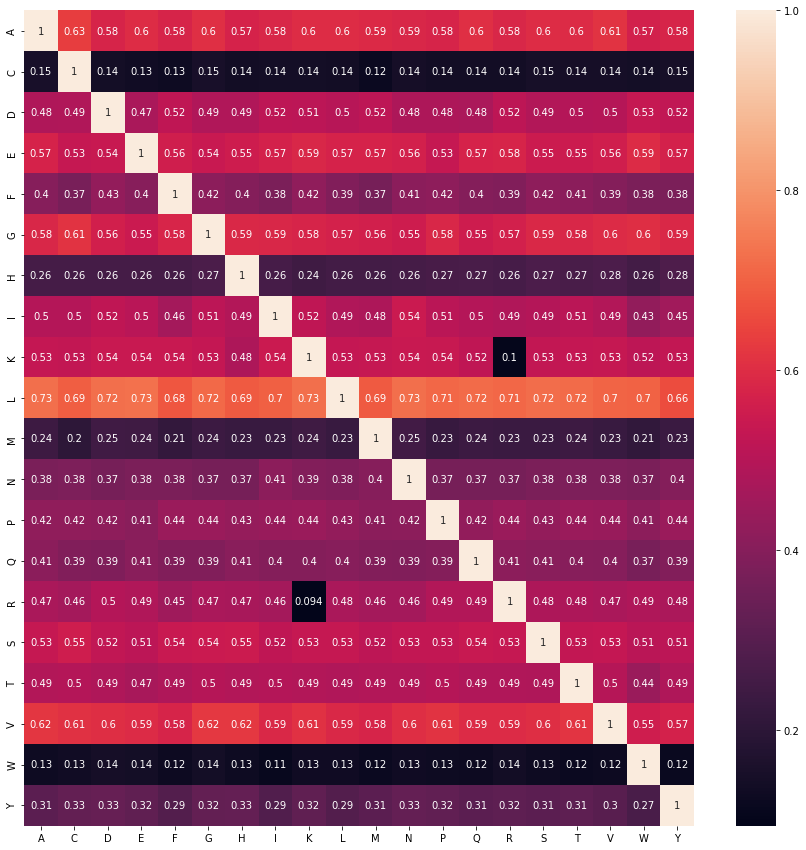

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15)) 

all_df.columns=aas
all_df.index=aas

# sns.heatmap(all_df)
for char in aas:
    all_df[char]=all_df[char].astype(float)

sns.heatmap(all_df, annot=True, ax=ax)


# all_df[char]=all_df[char].astype(float)
# all_df.dtypes


In [213]:
all_df

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,1.000000,0.633724,0.575291,0.599740,0.578201,0.604980,0.571644,0.584986,0.599695,0.598809,0.592644,0.585250,0.578239,0.604253,0.584856,0.597956,0.595783,0.612702,0.566882,0.576956
C,0.152468,1.000000,0.139874,0.134246,0.128706,0.153262,0.138269,0.141222,0.143057,0.137514,0.120089,0.143635,0.139143,0.138229,0.138056,0.149363,0.144735,0.144958,0.141223,0.147357
D,0.484336,0.489461,1.000000,0.473399,0.519225,0.489946,0.486826,0.518169,0.514115,0.503722,0.515185,0.481651,0.480885,0.477986,0.517222,0.493377,0.497056,0.499944,0.533068,0.523256
E,0.572910,0.533021,0.537144,1.000000,0.557836,0.540917,0.550816,0.569546,0.585580,0.574712,0.574533,0.564881,0.533044,0.574182,0.578441,0.548253,0.547446,0.560334,0.594729,0.569767
F,0.399932,0.370023,0.426583,0.403916,1.000000,0.415595,0.396989,0.379476,0.421541,0.388258,0.366676,0.409833,0.418975,0.395415,0.389207,0.418948,0.408873,0.394986,0.379910,0.377378
G,0.583164,0.614052,0.560969,0.545830,0.579179,1.000000,0.587202,0.585119,0.575788,0.569408,0.564224,0.552766,0.583346,0.553248,0.566309,0.587864,0.584007,0.595209,0.601691,0.586469
H,0.256705,0.258080,0.259671,0.258936,0.257739,0.273556,1.000000,0.260482,0.243896,0.255024,0.255224,0.256541,0.266832,0.268982,0.260633,0.274883,0.267835,0.276100,0.255594,0.277801
I,0.495267,0.496956,0.521082,0.504778,0.464484,0.513912,0.491092,1.000000,0.519710,0.486788,0.482028,0.544513,0.508435,0.496760,0.486961,0.494008,0.509243,0.492479,0.425659,0.454757
K,0.531440,0.526932,0.541159,0.543235,0.540078,0.529343,0.481305,0.543990,1.000000,0.531913,0.534411,0.542230,0.538616,0.518525,0.102636,0.528699,0.530741,0.533370,0.516658,0.527907
L,0.725265,0.692272,0.724669,0.728678,0.679863,0.715455,0.687829,0.696393,0.726984,1.000000,0.687935,0.725549,0.711035,0.718890,0.712453,0.723098,0.719430,0.703175,0.699652,0.662368
